In [1]:
# this is for disk monitoring during snap creation

In [2]:
import parse
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import parse

import glob
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator

In [7]:
dirr="/home/nivek/Workspace/distristorage/cloudlabs/ceph/data-creation/"

node0 = "139"
node1 = "146"
datas={}
for f in os.listdir(dirr):
    try:
        ind =parse.parse("sar_createamd{:d}.utah.cloudlab.us", f)[0]
    except:
        continue
    nwork=0
    datas[str(ind)+"-"+str(nwork)] = {"network":[], "disk":[], "cpu":[]}
    with open(dirr+f, "r") as fd:
        lines = fd.readlines()
        for line in lines:
            if "ens1f0" in line:
                h = float(line.split()[-1])
                datas[str(ind)+"-"+str(nwork)]["network"] += [h]
            if "all" in line:
                # 2 => application level
                # 4 => system level
                h = float(line.split()[4])+float(line.split()[2])
                datas[str(ind)+"-"+str(nwork)]["cpu"] += [h]
            if "dev8-0" in line: # try with dev8-16 if it's now working with dev8-0
                h = float(line.split()[-1]) ## real column for disk usage
                #h = float(line.split()[-2]) ## column for queue length
                datas[str(ind)+"-"+str(nwork)]["disk"] += [h]

<IPython.core.display.Javascript object>


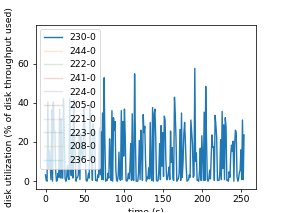

230-0 17.77486033519553
244-0 20.373541666666668
222-0 24.54255319148936
241-0 20.84333333333333
224-0 16.296321243523316
205-0 18.70872340425532
221-0 21.957635467980293
223-0 16.656318181818182
208-0 1.6849999999999996
236-0 26.459050632911396


In [8]:
%matplotlib notebook

fig, ax = plt.subplots()
lines= []

for k in datas:
    if k[-2:] == "-0":
        lab = "node0" if node0 in k else "node1" if node1 in k else k
        t = datas[k]["disk"][:]
        del t[-1]
        l = ax.plot(t, label=lab)
        tmp = []
        for i in range(len(t)):
            if t[i] > 1: tmp += [t[i]]
        print(lab, np.mean(tmp))
        lines.append(l[0])
        
leg = ax.legend()

lined = {}  # Will map legend lines to original lines.
for legline, origline in zip(leg.get_lines(), lines):
    legline.set_picker(True)  # Enable picking on the legend line.
    legline.set_pickradius(2)
    lined[legline] = origline

def on_pick(event):
    # On the pick event, find the original line corresponding to the legend
    # proxy line, and toggle its visibility.
    legline = event.artist
    origline = lined[legline]
    visible = not origline.get_visible()
    origline.set_visible(visible)
    # Change the alpha on the line in the legend so we can see what lines
    # have been toggled.
    legline.set_alpha(1.0 if visible else 0.2)
    fig.canvas.draw()

fig.canvas.mpl_connect('pick_event', on_pick)

ax.set_ylabel("disk utilization (% of disk throughput used)")
ax.set_xlabel("time (s)")

plt.show()